In [20]:
### 데이터 처리(조작) 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

In [2]:
file_path = "./files_org/SAMPLE_DB_40TABLE_2013.txt"

df4 = pd.read_csv(file_path)
df4.head()

,key,SICK_SNO,SICK_DGSBJT_CD,DMD_SICK_SYM,DMD_DGSBJT_CD
0,1,3,01,K599,1
1,1,2,01,R100,1
2,1,1,01,A090,1
3,1,4,01,K291,1
4,2,1,01,I109,1


In [3]:
file_path = "./files_org/SAMPLE_DB_20TABLE_2013.txt"

df2 = pd.read_csv(file_path)
df2["RECU_FR_DD"]

0       20130108
1       20130212
2       20130222
3       20130608
4       20131128
          ...   
5626    20131001
5627    20130423
5628    20130112
5629    20130401
5630    20130503
Name: RECU_FR_DD, Length: 5631, dtype: int64

In [29]:
file_path = "./files_org/표본자료 변수 테이블(2012-2013).xlsx"

df4_table = pd.read_excel(file_path, sheet_name="40table_상병")
df4_table.head()

df4_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   변수명         5 non-null      object 
 1   형식          5 non-null      object 
 2   길이          5 non-null      int64  
 3   표준한글컬럼명     5 non-null      object 
 4   Unnamed: 4  0 non-null      float64
 5   컬럼설명        5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [32]:
df4_name = df4_table[["변수명", "표준한글컬럼명"]]

In [5]:
file_path= "./files_org/상병기호.csv"

df4_number = pd.read_csv(file_path, encoding="ansi")
df4_number.head()

df4_num = df4_number[["상병기호","한글명"]]

In [26]:
df4_number.head()

,상병기호,한글명,영문명,완전코드구분,주상병사용구분,법정감염병구분,성별구분,상한연령,하한연령,양한방구분
0,A00,콜레라,Cholera,N,NaN,제2급,NaN,NaN,NaN,양·한방 공통
1,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라,"Cholera due to Vibrio cholerae 01, biovar chol...",NaN,NaN,제2급,NaN,NaN,NaN,양·한방 공통
2,A000,고전적 콜레라,Classical cholera,NaN,NaN,NaN,NaN,NaN,NaN,양·한방 공통
3,A001,비브리오 콜레라 01 엘토르형균에 의한 콜레라,"Cholera due to Vibrio cholerae 01, biovar eltor",NaN,NaN,제2급,NaN,NaN,NaN,양·한방 공통
4,A001,엘토르 콜레라,Cholera eltor,NaN,NaN,NaN,NaN,NaN,NaN,양·한방 공통


In [14]:
df4_num["상병기호"].head()


0     A00
1    A000
2    A000
3    A001
4    A001
Name: 상병기호, dtype: object

In [33]:
df4_table_dict = dict(df4_name.to_numpy())
df4_table_dict

{'key': '명세서 연결코드',
 'SICK_SNO': '상병일련번호',
 'SICK_DGSBJT_CD': '상병진료과목코드',
 'DMD_SICK_SYM': '청구상병기호',
 'DMD_DGSBJT_CD': '청구진료과목코드'}

In [34]:
df4_kor = df4.rename(columns = df4_table_dict)

In [35]:
df4_kor

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
0,1,3,01,K599,1
1,1,2,01,R100,1
2,1,1,01,A090,1
3,1,4,01,K291,1
4,2,1,01,I109,1
...,...,...,...,...,...
15592,5630,2,01,J209,1
15593,5630,1,05,M7954,5
15594,5630,4,05,M159,5
15595,5630,3,01,J0390,1


In [36]:
df4_kor.info() 
# 결측데이터 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15597 entries, 0 to 15596
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   명세서 연결코드  15597 non-null  int64 
 1   상병일련번호    15597 non-null  int64 
 2   상병진료과목코드  15597 non-null  object
 3   청구상병기호    15597 non-null  object
 4   청구진료과목코드  15597 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 609.4+ KB


In [37]:
df4_kor.isnull().sum() 
# 결측데이터 없음

명세서 연결코드    0
상병일련번호      0
상병진료과목코드    0
청구상병기호      0
청구진료과목코드    0
dtype: int64

In [38]:
df4_kor.describe()

,명세서 연결코드,상병일련번호,청구진료과목코드
count,15597.000000,15597.000000,15597.000000
mean,2827.448099,2.689171,7.704751
std,1631.440044,2.476707,10.299277
min,1.000000,1.000000,0.000000
25%,1420.000000,1.000000,1.000000
50%,2816.000000,2.000000,5.000000
75%,4262.000000,3.000000,12.000000
max,5631.000000,24.000000,56.000000


In [39]:
df4_kor.duplicated().value_counts()
# 중복 데이터 없음

False    15597
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2cab9640e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2cab9645370>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cab9640b20>],
 'medians': [<matplotlib.lines.Line2D at 0x2cab96458b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cab9645b50>],
 'means': []}

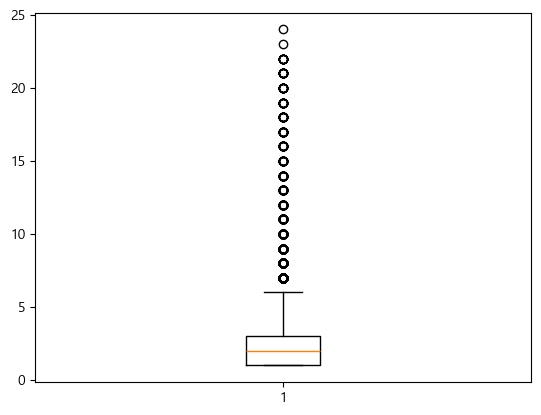

In [40]:
# 이상치 확인해 보기
# 현재 컬럼의 값들이 일련번호, 과목코드이기 때문에 이상치를 예측해볼수 있는 데이터가 없음

plt.boxplot(df4_kor["상병일련번호"])

In [46]:
a = df4_kor["청구상병기호"] == "N185"
df4_kor[a == True]

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
122,42,1,01,N185,1
201,74,1,01,N185,1
223,81,1,01,N185,1
233,84,1,01,N185,1
539,195,1,01,N185,1
...,...,...,...,...,...
15033,5427,1,01,N185,1
15092,5450,1,01,N185,1
15357,5539,1,01,N185,1
15443,5574,1,01,N185,1


In [47]:
# 상병기호.csv 파일에 한개의 상병기호로 여러 병명들이 정의되어 있어서 제일 위에꺼를 기준으로 제거함
drop_df4_num = df4_num.drop_duplicates(["상병기호"],keep="first")
drop_df4_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21299 entries, 0 to 47797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상병기호    21299 non-null  object
 1   한글명     21299 non-null  object
dtypes: object(2)
memory usage: 499.2+ KB


In [190]:
# 상병 코드를 알수 없는 데이터는 삭제 시킴

df4_kor_merge = pd.merge(
                        left=df4_kor,
                        right=drop_df4_num,
                        how="inner",
                        left_on="청구상병기호",
                        right_on="상병기호")

In [191]:
df4_kor_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15156 entries, 0 to 15155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   명세서 연결코드  15156 non-null  int64 
 1   상병일련번호    15156 non-null  int64 
 2   상병진료과목코드  15156 non-null  object
 3   청구상병기호    15156 non-null  object
 4   청구진료과목코드  15156 non-null  int64 
 5   상병기호      15156 non-null  object
 6   한글명       15156 non-null  object
dtypes: int64(3), object(4)
memory usage: 829.0+ KB


In [192]:
df4_kor_merge.isnull().sum()

명세서 연결코드    0
상병일련번호      0
상병진료과목코드    0
청구상병기호      0
청구진료과목코드    0
상병기호        0
한글명         0
dtype: int64

In [194]:
df4_kor_merge.head()

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드,상병기호,한글명
0,1,3,01,K599,1,K599,상세불명의 기능성 장장애
1,1,2,01,R100,1,R100,급성 복증
2,1,1,01,A090,1,A090,감염성 기원의 기타 및 상세불명의 위장염 및 결장염
3,1,4,01,K291,1,K291,기타 급성 위염
4,2,1,01,I109,1,I109,기타 및 상세불명의 원발성 고혈압


In [195]:
df4_kor_merge["기호 해석"] = df4_kor_merge["청구상병기호"] + ' : ' + df4_kor_merge["한글명"]
df4_kor_merge.head()

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드,상병기호,한글명,기호 해석
0,1,3,01,K599,1,K599,상세불명의 기능성 장장애,K599 : 상세불명의 기능성 장장애
1,1,2,01,R100,1,R100,급성 복증,R100 : 급성 복증
2,1,1,01,A090,1,A090,감염성 기원의 기타 및 상세불명의 위장염 및 결장염,A090 : 감염성 기원의 기타 및 상세불명의 위장염 및 결장염
3,1,4,01,K291,1,K291,기타 급성 위염,K291 : 기타 급성 위염
4,2,1,01,I109,1,I109,기타 및 상세불명의 원발성 고혈압,I109 : 기타 및 상세불명의 원발성 고혈압


In [196]:
df4_kor_merge["기호 해석"].value_counts()

기호 해석
J209 : 상세불명의 급성 기관지염          681
I109 : 기타 및 상세불명의 원발성 고혈압     634
K297 : 상세불명의 위염               469
J304 : 상세불명의 알레르기비염           442
J303 : 기타 알레르기비염              269
                             ... 
N179 : 상세불명의 급성 신부전             1
Z034 : 의심되는 심근경색증의 관찰, 배제된      1
K035 : 치아의 강직증                  1
Z305 : (자궁내)피임장치의 감시            1
L301 : 발한이상[한포(汗疱)]             1
Name: count, Length: 1133, dtype: int64

In [197]:
number_counts_df = pd.DataFrame(df4_kor_merge["기호 해석"].value_counts()).reset_index()

number_counts_df.columns = ['상병명', '청구 빈도']

In [200]:
top10 = number_counts_df.head(10)

In [201]:
top10

,상병명,청구 빈도
0,J209 : 상세불명의 급성 기관지염,681
1,I109 : 기타 및 상세불명의 원발성 고혈압,634
2,K297 : 상세불명의 위염,469
3,J304 : 상세불명의 알레르기비염,442
4,J303 : 기타 알레르기비염,269
5,K291 : 기타 급성 위염,240
6,K30 : 기능성 소화불량,222
7,E119 : 합병증을 동반하지 않은 2형 당뇨병,202
8,J00 : 급성 비인두염[감기],182
9,K210 : 식도염을 동반한 위-식도역류병,179


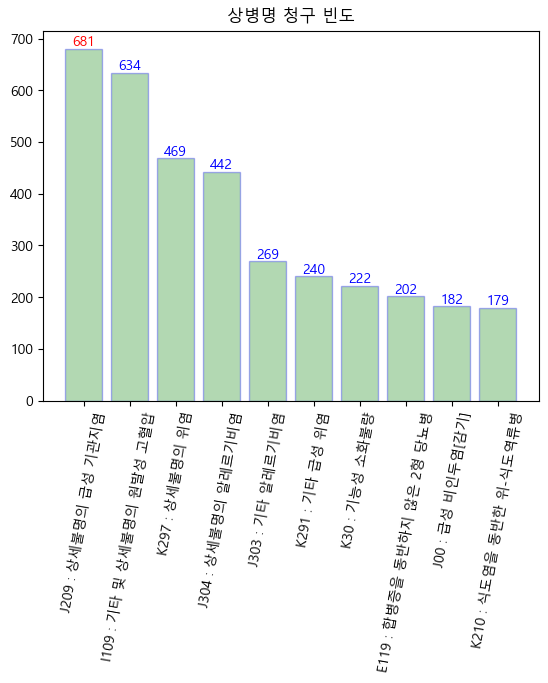

In [215]:
plt.title("상병명 청구 빈도")

plt.bar(top10["상병명"], top10["청구 빈도"], edgecolor="blue", alpha = 0.3, color="green")
plt.xticks(rotation=80)

for idx ,x_v in enumerate(top10["상병명"]) :

    if top10["청구 빈도"][idx] == max(top10["청구 빈도"]) :
        color2 = "red"
    else :
        color2 = "blue"

    # 각 막대에 y축의 값 표시하기
    plt.text(
        # 텍스트가 위치할 x축 위치 값 정의(x 좌표)
        x_v,
        
        # 텍스트가 위치할 y축 위치 값 정의(y 좌표)
        top10["청구 빈도"][idx],
       
        # 텍스트로 표시할 값 정의
        top10["청구 빈도"][idx],

        color = color2,


        # 텍스트 수평정렬하기 left,center,right
        horizontalalignment = "center",

        #텍스트 수직정렬 하기
        verticalalignment = "bottom"
        
    )


plt.show()

In [ ]:
"""
(해석)
1. 청구 빈도수가 가장높은 10개를 추출하여 막대그래프로 작성하였다.
2. 신장병 다음으로 급성 기관지염,고혈압의 청구빈도가 높았다.
3. 그다음으론 위염과 알르레기성비염의 청구빈도가 비슷하게 높았다.
4. 남은 6개의 데이터는 모두 빈도수가 비슷했다. (비염,위염,소화불량,당뇨병,비인두염,역류성식도염)

"""
